In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess


In [2]:
holidays_events = pd.read_csv("./holidays_events.csv",
        dtype={
        'type': 'category',
        'locale': 'category',
        'locale_name': 'category',
        'description': 'category',
        'transferred': 'bool',
                              },
        parse_dates=['date'],
        infer_datetime_format = True,
        )

C:\Users\91972\AppData\Local\Temp\ipykernel_21160\2297940603.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  holidays_events = pd.read_csv("./holidays_events.csv",


In [3]:
holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [4]:
holidays_events = holidays_events.set_index('date').to_period('D')
holidays_events.head()

,type,locale,locale_name,description,transferred
date,,,,,
2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [5]:
holiday = (
    holidays_events.query("locale in ['National','Regional']")
    .loc['2017':'2017-08-15',['description']]
    .assign(description=lambda x: x.description.cat.remove_unused_categories())
    
)
display(holiday)

,description
date,
2017-01-01,Primer dia del ano
2017-01-02,Traslado Primer dia del ano
2017-02-27,Carnaval
2017-02-28,Carnaval
2017-04-01,Provincializacion de Cotopaxi
2017-04-14,Viernes Santo
2017-05-01,Dia del Trabajo
2017-05-13,Dia de la Madre-1
2017-05-14,Dia de la Madre


In [6]:
store_sales = pd.read_csv('./train.csv',
                          usecols=['store_nbr','family','date','sales'],
                          dtype={
                              'store_nbr' : 'category',
                              'family' : 'category',
                              'sales' : 'float32',
                          },
                          parse_dates=['date'],
                          infer_datetime_format = True)

C:\Users\91972\AppData\Local\Temp\ipykernel_21160\2235315406.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  store_sales = pd.read_csv('./train.csv',


In [7]:
store_sales['date'] = store_sales.date.dt.to_period('D')
store_sales = store_sales.set_index(['store_nbr','family','date']).sort_index()

average_sales = (
    store_sales.groupby('date').mean().squeeze().loc['2017']
)

average_sales.head()

date
2017-01-01      6.780303
2017-01-02    786.928406
2017-01-03    619.740234
2017-01-04    555.607971
2017-01-05    436.375397
Freq: D, Name: sales, dtype: float32

In [8]:
X = average_sales.to_frame()
X.head()

,sales
date,
2017-01-01,6.780303
2017-01-02,786.928406
2017-01-03,619.740234
2017-01-04,555.607971
2017-01-05,436.375397


In [9]:
# Define a simple seasonal_plot function
def seasonal_plot(X, y, period, freq):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 6))
    for key, grp in X.groupby(period):
        plt.plot(grp[freq], grp[y], label=f"{period} {key}")
    plt.xlabel(freq)
    plt.ylabel(y)
    plt.title(f"Seasonal Plot: {y} by {freq} for each {period}")
    plt.legend()
    plt.show()

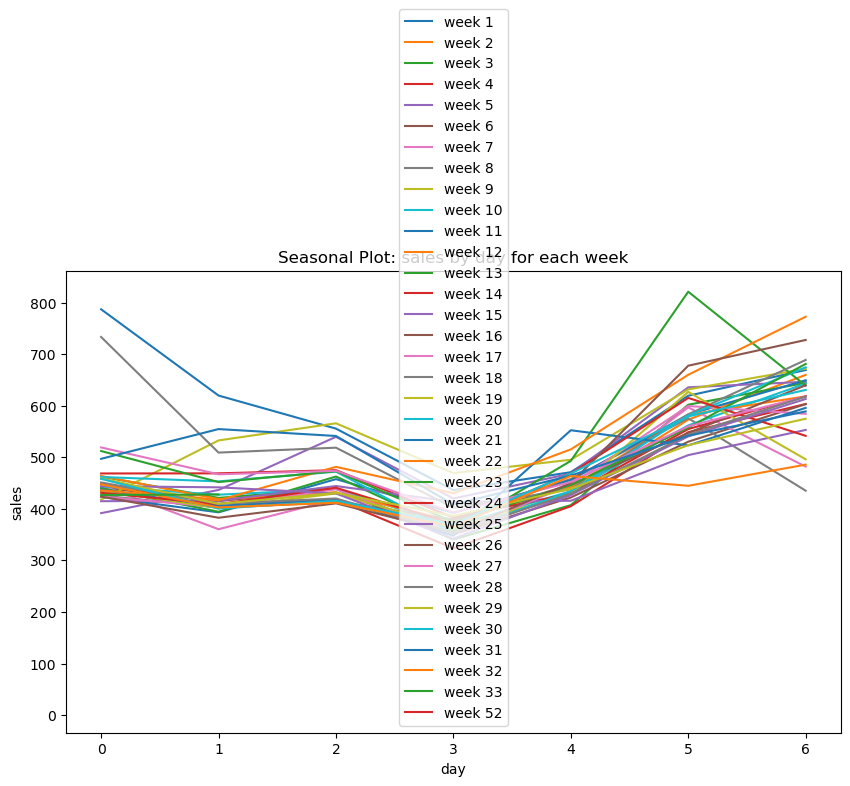

In [10]:
X["week"] = X.index.week
X["day"] = X.index.dayofweek
seasonal_plot(X, y = 'sales', period ='week', freq = 'day')

In [13]:
y = average_sales.copy()

fouriar = CalendarFourier(freq= 'M', order=4)
dp = DeterministicProcess(
    index= y.index,
    constant= True,
    order = 1,
    seasonal= True,
    additional_terms=[fouriar],
    drop=True
)
X = dp.in_sample()


c:\Users\91972\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:569: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index = pd.date_range("2020-01-01", freq=freq, periods=1)


In [14]:
X.head()

,const,trend,"s(2,7)","s(3,7)","s(4,7)","s(5,7)","s(6,7)","s(7,7)","sin(1,freq=ME)","cos(1,freq=ME)","sin(2,freq=ME)","cos(2,freq=ME)","sin(3,freq=ME)","cos(3,freq=ME)","sin(4,freq=ME)","cos(4,freq=ME)"
date,,,,,,,,,,,,,,,,
2017-01-01,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
2017-01-02,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.201299,0.979530,0.394356,0.918958,0.571268,0.820763,0.724793,0.688967
2017-01-03,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.394356,0.918958,0.724793,0.688967,0.937752,0.347305,0.998717,-0.050649
2017-01-04,1.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.571268,0.820763,0.937752,0.347305,0.968077,-0.250653,0.651372,-0.758758
2017-01-05,1.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.724793,0.688967,0.998717,-0.050649,0.651372,-0.758758,-0.101168,-0.994869


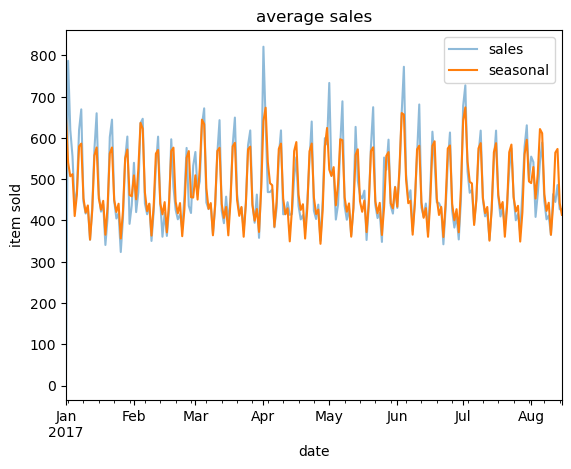

In [16]:
model = LinearRegression().fit(X,y)
y_pred = pd.Series(
    model.predict(X),
    index= X.index,
    name='fitted',
)

y_pred = pd.Series(model.predict(X),index=X.index)

ax = y.plot(alpha = 0.5, title = 'average sales', ylabel = 'item sold')
ax = y_pred.plot(ax = ax, label = 'seasonal')
ax.legend()